## Challenge: Model Comparison

### KNN vs LR

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?


Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import scipy
from math import sqrt
from collections import Counter
import warnings
import random
style.use ('fivethirtyeight')
%matplotlib inline

<b>I am going to use the Breast Cancer dataset from UCI which can be found here: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original) </b>

In [78]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                names=['id','clump_thickness','uniform_cell_size',
'uniform_cell_shape','marginal_adhesion','single_epi_cell_size','bare_nuclei','bland_chromation',
'normal_nucleoli','mitoses','bcancer'])
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)

In [79]:
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,bcancer
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [80]:
# Standardize the Variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df.drop('bcancer',axis=1))

c:\users\genta\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
scaled_features = scaler.transform(df.drop('bcancer',axis=1))

c:\users\genta\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [82]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,0.152886,-0.179662,-0.611825,-0.343912
1,0.206936,0.283845,0.266875,0.768621,1.710106,0.153487,-0.179662,-0.284112,-0.343912
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,0.152952,-0.179662,-0.611825,-0.343912
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.153086,-0.179662,1.354454,-0.343912
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,0.152886,-0.179662,-0.611825,-0.343912


In [83]:
#Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['bcancer'],
                                                    test_size=0.30)

## KNN

In [84]:
#KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

#Knn w k=1
knn = KNeighborsClassifier(n_neighbors=1)

In [85]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [86]:
pred = knn.predict(X_test)

In [87]:
#evaluate w/ confusion matrix and classification report
from sklearn.metrics import classification_report,confusion_matrix



In [88]:
print(confusion_matrix(y_test,pred))


[[132   2]
 [  5  71]]


In [89]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           2       0.96      0.99      0.97       134
           4       0.97      0.93      0.95        76

   micro avg       0.97      0.97      0.97       210
   macro avg       0.97      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



In [90]:
#cross val scoring
from sklearn.model_selection import cross_val_score

score = cross_val_score(knn, X_train,y_train, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: 0.94 (+/- 0.04)


In [91]:
#pick a K???
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

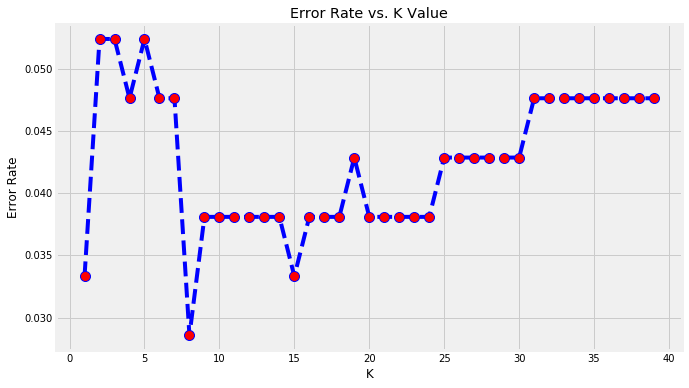

In [92]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the results I want to try it with k=8

In [93]:
knn8 = KNeighborsClassifier(n_neighbors=8)

knn8.fit(X_train,y_train)
pred8 = knn8.predict(X_test)

print('WITH K=8')
print('\n')
print(confusion_matrix(y_test,pred8))
print('\n')
print(classification_report(y_test,pred8))

WITH K=8


[[132   2]
 [  4  72]]


              precision    recall  f1-score   support

           2       0.97      0.99      0.98       134
           4       0.97      0.95      0.96        76

   micro avg       0.97      0.97      0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



In [94]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[132   2]
 [  5  71]]


              precision    recall  f1-score   support

           2       0.96      0.99      0.97       134
           4       0.97      0.93      0.95        76

   micro avg       0.97      0.97      0.97       210
   macro avg       0.97      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



In [95]:
#cross val score of k=1 and k=8

#k=1
score = cross_val_score(knn, X_train,y_train, cv=5)
print("Unweighted Accuracy w/ k=1: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

#k=8
score8 = cross_val_score(knn8, X_train,y_train, cv=5)
print("Unweighted Accuracy w/ k=8: %0.2f (+/- %0.2f)" % (score8.mean(), score8.std() * 2))

Unweighted Accuracy w/ k=1: 0.94 (+/- 0.04)
Unweighted Accuracy w/ k=8: 0.95 (+/- 0.02)


### Weighted KNNs

In [96]:
#k=1 with weight
knnw = KNeighborsClassifier(n_neighbors=1, weights='distance')

knnw.fit(X_train,y_train)
predw = knnw.predict(X_test)

#k = 8 with weight
knnw8 = KNeighborsClassifier(n_neighbors=8, weights='distance')

knnw8.fit(X_train,y_train)
predw8 = knnw8.predict(X_test)

In [97]:
scorew = cross_val_score(knnw, X_train,y_train, cv=5)
print("Weighted Accuracy w/ k=1: %0.2f (+/- %0.2f)" % (scorew.mean(), scorew.std() * 2))

scorew8 = cross_val_score(knnw8, X_train,y_train, cv=5)
print("Weighted Accuracy w/ k=8: %0.2f (+/- %0.2f)" % (scorew8.mean(), scorew8.std() * 2))


Weighted Accuracy w/ k=1: 0.94 (+/- 0.04)
Weighted Accuracy w/ k=8: 0.96 (+/- 0.02)


#### Weighing helped with k=8 but not k=1. Moving on to do linear regression with the model.

## Linear Regression

In [98]:
#linear regression
from sklearn import linear_model

regr = linear_model.LinearRegression()

rfit = regr.fit(X_train, y_train)
rfit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_train,y_train))


Coefficients: 
 [0.24165401 0.11543516 0.16843308 0.1300184  0.06382175 0.02272529
 0.17625442 0.10632934 0.01224724]

Intercept: 
 2.690228926122167

R-squared:
0.7900757358195846


In [100]:
accuracy = regr.score(X_test, y_test)
accuracy

0.790536207440966

In [101]:
#LR CV score
scorelr = cross_val_score(rfit, X_train,y_train, cv=5)
print("LR rfit Score: %0.2f (+/- %0.2f)" % (scorelr.mean(), scorelr.std() * 2))

LR rfit Score: 0.77 (+/- 0.06)


In [102]:
#y_pred

y_pred=rfit.predict(X_test)


In [103]:
#explained variance score
from sklearn.metrics import explained_variance_score

#Mean Absolute Error
from sklearn.metrics import mean_absolute_error

#Mean Squared Error
from sklearn.metrics import mean_squared_error

#Median Absolute Error
from sklearn.metrics import median_absolute_error

#R2 Score
from sklearn.metrics import r2_score

In [104]:
print("These are the Linear Regression Results:")
print("The Explained Variance Score of the NY dataset is:", round(explained_variance_score(y_test, y_pred, multioutput='uniform_average'), 2))
print("The Mean Absolute Error of the NY dataset is:", round(mean_absolute_error(y_test, y_pred,  sample_weight=None, multioutput='uniform_average'), 2))
print("The Mean Squared Error of the NY dataset is:", round(mean_squared_error(y_test, y_pred), 2))
print("The Median Absolute Score of the NY dataset is:", round(median_absolute_error(y_test, y_pred), 2))
print("The R2 Score of the NY dataset is:", round(r2_score(y_test, y_pred), 2))
print("LR rfit Score: %0.2f (+/- %0.2f)" % (scorelr.mean(), scorelr.std() * 2))

print('\n\n')

print('These are the K-Nearest Neighbor Results:')
print("Weighted Accuracy w/ k=1: %0.2f (+/- %0.2f)" % (scorew.mean(), scorew.std() * 2))
print("Weighted Accuracy w/ k=8: %0.2f (+/- %0.2f)" % (scorew8.mean(), scorew8.std() * 2))
print("Unweighted Accuracy w/ k=1: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print("Unweighted Accuracy w/ k=8: %0.2f (+/- %0.2f)" % (score8.mean(), score8.std() * 2))

These are the Linear Regression Results:
The Explained Variance Score of the NY dataset is: 0.79
The Mean Absolute Error of the NY dataset is: 0.3
The Mean Squared Error of the NY dataset is: 0.19
The Median Absolute Score of the NY dataset is: 0.17
The R2 Score of the NY dataset is: 0.79
LR rfit Score: 0.77 (+/- 0.06)



These are the K-Nearest Neighbor Results:
Weighted Accuracy w/ k=1: 0.94 (+/- 0.04)
Weighted Accuracy w/ k=8: 0.96 (+/- 0.02)
Unweighted Accuracy w/ k=1: 0.94 (+/- 0.04)
Unweighted Accuracy w/ k=8: 0.95 (+/- 0.02)


Looking at the results of these models it seems as if the KNN is more accurate than the LR. 